<h2>DS Look On: Аренда квартир в Алмате  </h2>
Была вдохновлена 
    <a href='https://github.com/nyssarex/Projects/blob/master/Projects/House_prices/Krysha_forLinkedIn.ipynb'> данной работой</a> и решила сделать схожий анализ аренды квартир в Алмате
<br>Введение: в данном блокноте разобраны объявления аренды одно-, двух-, трех- и четырехкомнаетных квартир в городе Алматы. Все данные собраны, очищены, проанализированы и обработы с сайта <a href='krisha.kz'>krisha.kz</a>. В базе всего 2060 строк, выводы сделаны ограниченно на этом количестве строк, и их не достаточно для серьезных решений:)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<h3> Обзор данных</h3>
есть следующие столбцы:
<li>cost_kzt  - цена за аренду в месяц</li>
<li>rooms -  количество комнат</li>
<li>total_area - общая площадь</li>
<li>district - район местоположения</li>
<li>intersection_of_streets - пересечение улиц</li>
<li>app_floor - этаж</li>
<li>number_of_floors - всего этажей в доме</li>
P.S основываясь на логике оставила только эти столбцы, при дальнейшей работе планирую добавить больше данных либо категориальных, либо дискретных


In [26]:
df = pd.read_csv('rent_almaty.csv', index_col=0)
df.shape
df.head()

,cost_kzt,rooms,total_area,district,intersection_of_streets,app_floor,number_of_floors
0,250000,3,76,Медеуский р-н,Тулебаева — Кабанбай Батыра,2.0,4.0
1,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
2,100000,1,40,Алмалинский р-н,Шагабутдинова — Толе би,2.0,9.0
3,150000,3,60,Алмалинский р-н,Байтурсынова — Гоголя,4.0,5.0
4,340000,3,100,Бостандыкский р-н,Каблукова 270 — проспект Аль-Фараби,5.0,25.0


In [3]:
df = df[(df.district != 'Аскарова 8 — Саина')&(df.district != 'Брусиловского 163')&(df.district != 'Луганского 1')&
       (df.district != 'Аль-Фараби')]


In [4]:
df.dtypes

cost_kzt                     int64
rooms                        int64
total_area                   int64
district                    object
intersection_of_streets     object
app_floor                  float64
number_of_floors           float64
dtype: object

<h3> Посмотрим на простую статистику</h3>

In [5]:
df.describe()

,cost_kzt,rooms,total_area,app_floor,number_of_floors
count,2056.000000,2056.000000,2056.000000,2054.000000,2054.000000
mean,218683.608949,2.446498,70.645428,3.382181,7.927459
std,197032.432072,0.893914,36.618587,1.821155,5.898401
min,65000.000000,1.000000,25.000000,1.000000,3.000000
25%,100000.000000,2.000000,42.000000,2.000000,4.000000
50%,150000.000000,3.000000,60.000000,4.000000,5.000000
75%,250000.000000,3.000000,76.000000,5.000000,9.000000
max,1000000.000000,4.000000,200.000000,18.000000,25.000000


<h3> Самая низкая цена на аренду

In [6]:
df[df['cost_kzt']==df.cost_kzt.min()]

,cost_kzt,rooms,total_area,district,intersection_of_streets,app_floor,number_of_floors
22,65000,1,25,Бостандыкский р-н,"мкр Хан Тенгри, Кенесары хана 83/6",1.0,6.0


<h3> Самая высокая цена на аренду

In [7]:
df[df['cost_kzt']==df.cost_kzt.max()]

,cost_kzt,rooms,total_area,district,intersection_of_streets,app_floor,number_of_floors
42,1000000,4,145,Бостандыкский р-н,Сейфуллина — Тимирязева,9.0,21.0


<h3> Было интересно зависит ли цена от расположения квартиры по вертикали</h3>
Цены не сильно отличаются по этажам квартиры, но есть некие выделеняющиеся элементы. Итогом можно сказать что этажность не влияет на стоимость аренды, но скорее всего при большим количестве данных могут быть другие результаты 

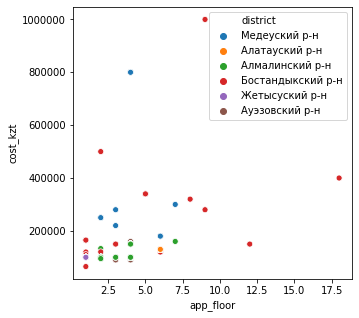

In [8]:
size = (5,5)
fig, ax = plt.subplots(figsize=size)
ax=sns.scatterplot(x='app_floor', y='cost_kzt',data=df, hue='district')

<h3>Зависимость стоимости от района</h3>
По графику ниже можно заметить, что в среднем в Медеуском районе квартиры дороже. А в Бостандыкском просто очень много трехкомнатных квартир сдаются, это показано на графиках ниже, из-за этого он стоит на втором месте по дороговизне аренды в данном графике.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

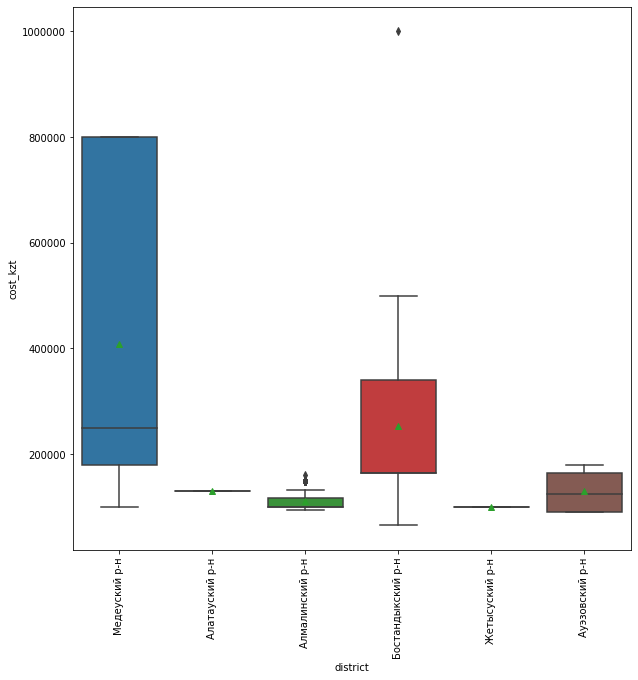

In [9]:
f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxplot(x='district', y="cost_kzt", data=df,showmeans=True)
plt.xticks(rotation=90)


<h3>Количество сдающихся квартир по каждому району</h3>
В Алматинском районе очень много однокомнатных, а в Бостандыкском районе очень много трехкомнатных, как говорилось раньше. 
<br>Что интересно, в Медеуском районе одинаковое высокое количество сдающихся квартир по комнатности. 
<br>В Ауезовском районе практически нет свободных квартир, по моему опыту, обычно летом все квартиры занимают в этом районе.
<br>P.S наверное при переезде буду искать квартиру в Алматинском или Медеуском районе.

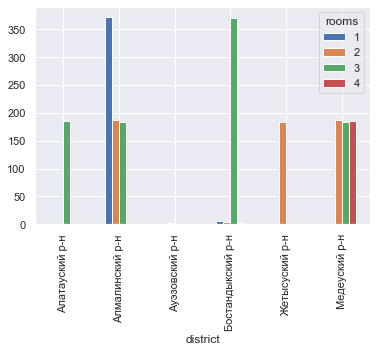

In [11]:
sns.set()

table = pd.pivot_table(df, values='cost_kzt', fill_value=0, index=['district'], columns='rooms',
                     aggfunc='count').plot(kind= 'bar')

<h3>Сводная таблица данных разделенная по районам и количествам комнат</h3>
<br>Темнозеленые - самые дорогие цены
<br>Светлозеленые - самые низкие цены

In [10]:
table = pd.pivot_table(df, values='cost_kzt', fill_value=0, index=['district', 'rooms'],
                     aggfunc=[np.min, np.max, np.mean])
cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm)

<h3>Средная цена квартир по комнатам</h3>
<li>Нижняя линия - минимальная цена</li>
<li>Линия посередине - медиана цен</li>
<li>Верхная линия - максимальная цена</li>
<li>Зеленая точка - средняя цен</li>

На данном графике можно заметить общие значения цен для трех и двух комнатных квартир. 

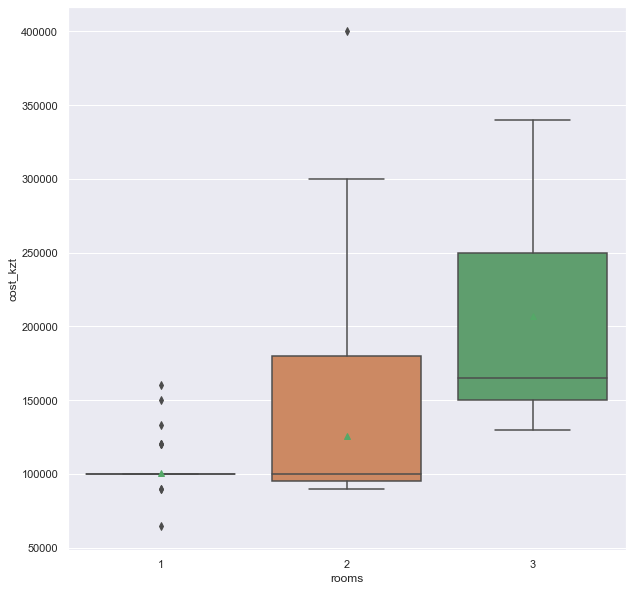

In [14]:
f, ax = plt.subplots(figsize=(10,10))
data = df[(df['rooms']!=4)]
fig = sns.boxplot(x='rooms', y="cost_kzt", data=data,showmeans=True)


Продолжим изучение трехкомнатных квартир по цене двух
<br>Найдем средние значения цен для разных комнат
<br>Найдем количество квартир трехкомнатных на 5000тг выше, чем средняя цена для двухкомнатных квартир

In [27]:
mean_2 = df[df['rooms']==2].cost_kzt.mean()
mean_1 = df[df['rooms']==1].cost_kzt.mean()
mean_3 = df[df['rooms']==3].cost_kzt.mean()
df[(df['rooms']==3)&(df['cost_kzt']<(mean_2+5000))].cost_kzt.count()


185

Всего <b>185</b> трехкомнатных квартир чуть выше по средней цене двухкомантных. Ниже таблица с данными, где найти эти квартиры! 

In [29]:
three = df[(df['rooms']==3)&(df['cost_kzt']<(mean_2+5000))]
three.head(100)

,cost_kzt,rooms,total_area,district,intersection_of_streets,app_floor,number_of_floors
1,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
11,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
48,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
59,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
70,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
...,...,...,...,...,...,...,...
1071,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
1082,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
1093,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0
1104,130000,3,71,Алатауский р-н,3-я — Момышулы,6.0,12.0


<h3>Все 185 квартир в Алатауском районе!</h3>
<br> При переезде буду искать в этом районе квартиру!

In [30]:
three.district.value_counts()

Алатауский р-н    185
Name: district, dtype: int64

<h2>Средние цены на:</h2>
<li>однокомнатная квартира - <b>100389тг</b></li>
<li>двухкомнатная квартира - <b>125903тг</b></li>
<li>трехкомнатная квартира - <b>207088тг</b></li>

In [31]:
mean_1,\
mean_2,\
mean_3

(100389.47368421052, 125981.44876325088, 207451.403887689)

<h1>Вывод</h1>
<br>-Этаж не влияет на цену
<br>-Большинство всего свободных квартир в <i>Алмалинском районе</i>
<br>-Трехкомнатные квартиры лучше искать в <i>Алатауском или Бостандыкском районе</i>
<br>-В <i>Алатауском районе</i> можно найти трехкомнатную по цене двухкомнатной квартиры(для больших семей полезная информация)
<br>-И просто интересный факт: Самая не дорогая и дорогая квартиры в <i>Бостандыкском районе</i>